In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
np.random.seed(10)
from tensorflow.keras.preprocessing.image import img_to_array
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from imutils import paths

### 訓練模型

In [3]:
imagePaths_train = sorted(list(paths.list_images(".\\Face\\train")))
imagePaths_test = sorted(list(paths.list_images(".\\Face\\test")))

train_feature = []
train_label = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4]
test_feature = []
test_label = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4]

In [4]:
for imagePath in imagePaths_train:
    #print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    train_feature.append(image)
for imagePath in imagePaths_test:
    #print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    test_feature.append(image)

In [5]:
train_feature = np.array(train_feature, dtype="float")
test_feature = np.array(test_feature, dtype="float")
train_label = np.array(train_label)
test_label = np.array(test_label)

print("Train Data shape:" + str(train_feature.shape))
print("Test Data shape:" + str(test_feature.shape))
print("Train Label shape:" + str(train_label.shape))
print("Test Label shape:" + str(test_label.shape))  

Train Data shape:(40, 112, 92, 1)
Test Data shape:(20, 112, 92, 1)
Train Label shape:(40,)
Test Label shape:(20,)


In [6]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='gray')
    plt.show() 

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='gray')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

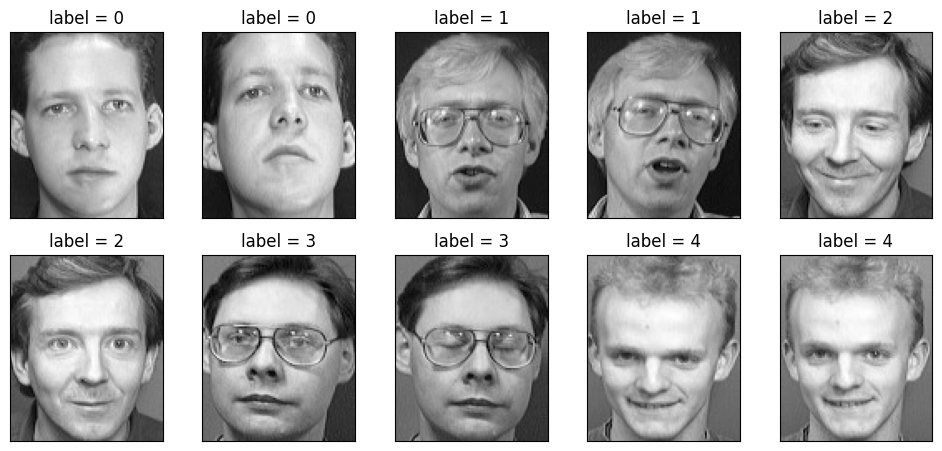

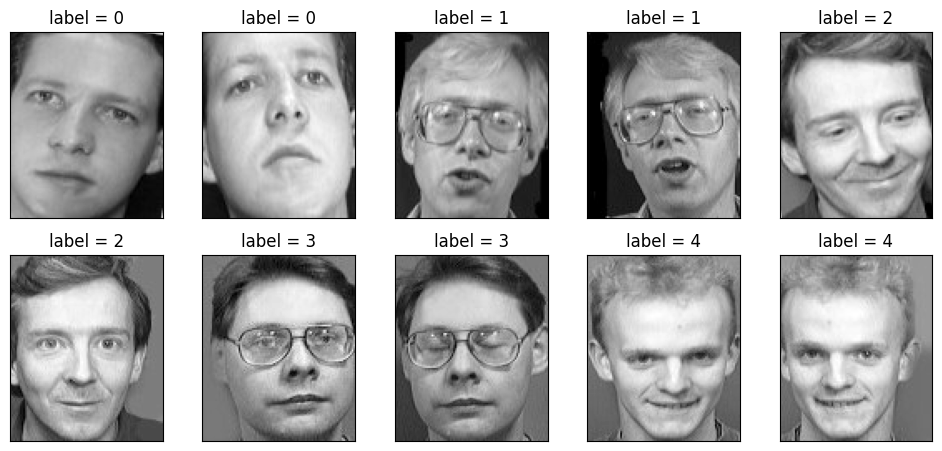

In [7]:
#原始測試圖片
show_images_labels_predictions(test_feature,test_label,[],0,10)
#經位移、旋轉之測試圖片
show_images_labels_predictions(test_feature,test_label,[],10,10)

In [8]:
#將 Features 特徵值轉換為 10304個 float 數字的 1 維向量
train_feature_vector =train_feature.reshape(len(train_feature), 10304).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 10304).astype('float32')
print(train_feature_vector)
print(train_feature_vector.shape)

[[ 36.  31.  33. ...  37.  37.  35.]
 [ 50.  48.  44. ...  46.  46.  46.]
 [ 60.  61.  59. ...  35.  33.  33.]
 ...
 [129. 125. 124. ...  84.  84.  85.]
 [129. 128. 128. ...  84.  84.  85.]
 [129. 132. 129. ...  53.  54.  56.]]
(40, 10304)


In [9]:
#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255
print(train_feature_normalize)

[[0.14117648 0.12156863 0.12941177 ... 0.14509805 0.14509805 0.13725491]
 [0.19607843 0.1882353  0.17254902 ... 0.18039216 0.18039216 0.18039216]
 [0.23529412 0.23921569 0.23137255 ... 0.13725491 0.12941177 0.12941177]
 ...
 [0.5058824  0.49019608 0.4862745  ... 0.32941177 0.32941177 0.33333334]
 [0.5058824  0.5019608  0.5019608  ... 0.32941177 0.32941177 0.33333334]
 [0.5058824  0.5176471  0.5058824  ... 0.20784314 0.21176471 0.21960784]]


In [19]:
#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = to_categorical(train_label)
test_label_onehot = to_categorical(test_label)
print(train_label_onehot)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [12]:
#建立模型
model = Sequential()
#輸入層：10304, 隱藏層：512，輸出層：5
model.add(Dense(units=512, 
                input_dim=10304, 
                kernel_initializer='normal', 
                activation='relu'))
#model.add(Dense(units=512,  
#                kernel_initializer='normal', 
#                activation='relu'))
model.add(Dense(units=5, 
                kernel_initializer='normal', 
                activation='softmax'))
model.summary()  # 模型可視化
#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5276160   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 5278725 (20.14 MB)
Trainable params: 5278725 (20.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [13]:
#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

Epoch 1/20


1/1 - 1s - loss: 3.1596 - accuracy: 0.2500 - val_loss: 26.0844 - val_accuracy: 0.0000e+00 - 589ms/epoch - 589ms/step
Epoch 2/20
1/1 - 0s - loss: 14.1849 - accuracy: 0.2500 - val_loss: 42.7453 - val_accuracy: 0.0000e+00 - 49ms/epoch - 49ms/step
Epoch 3/20
1/1 - 0s - loss: 22.6511 - accuracy: 0.3750 - val_loss: 52.1628 - val_accuracy: 0.0000e+00 - 53ms/epoch - 53ms/step
Epoch 4/20
1/1 - 0s - loss: 28.5244 - accuracy: 0.2500 - val_loss: 45.3567 - val_accuracy: 0.0000e+00 - 53ms/epoch - 53ms/step
Epoch 5/20
1/1 - 0s - loss: 23.0489 - accuracy: 0.2500 - val_loss: 37.4287 - val_accuracy: 0.0000e+00 - 53ms/epoch - 53ms/step
Epoch 6/20
1/1 - 0s - loss: 18.3241 - accuracy: 0.2500 - val_loss: 28.3459 - val_accuracy: 0.0000e+00 - 50ms/epoch - 50ms/step
Epoch 7/20
1/1 - 0s - loss: 12.0868 - accuracy: 0.2500 - val_loss: 20.6925 - val_accuracy: 0.0000e+00 - 50ms/epoch - 50ms/step
Epoch 8/20
1/1 - 0s - loss: 6.2844 - accuracy: 0.5625 - val_loss: 20.0980 - val_accuracy: 0.0000e+00 - 49ms/

In [14]:
#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

1/1 [==============================] - 0s 30ms/step - loss: 2.0522 - accuracy: 0.4500

準確率= 0.44999998807907104


In [13]:
#將模型儲存至 HDF5檔案中
#model.save('Face_mlp_model.h5')

### 測試模型

In [15]:
predict=model.predict(test_feature_normalize)
prediction=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 63ms/step


In [17]:
# 顯示圖片及預測結果的函數
import random

def plot_images_labels_prediction(images, labels, prediction=[], names=[], predictions_array=[], num=20):
    # 取得 pyplot 物件參考
    fig = plt.gcf()

    # 設定畫布大小為 12 吋*14吋
    fig.set_size_inches(12, 14)

    idx = random.randint(0, images.shape[0] - 1)

    # 限制最多顯示 20 個子圖
    if num > 20: num = 20

    # 依序顯示 num 個子圖
    for i in range(0, num):
        # 建立 5*5 個子圖中的第 i+1 個 
        ax = plt.subplot(5, 5, i + 1)

        # 顯示子圖
        ax.imshow(images[idx], cmap='gray')

        title = ""
        color = 'black'
        label = labels[idx]
        pred = None

        # 有預測值就加入標題中
        if len(prediction) > 0:
            if prediction[idx] != labels[idx]:
                color = 'red'
                confidence = 100 * np.min(predictions_array[idx])
            else:
                color = 'blue'
                confidence = 100 * np.max(predictions_array[idx])
            pred = prediction[idx]
        
        if len(names) > 0:
            # print(names)
            # print(label)
            label = names[label]
            if pred != None:
                pred = names[pred]

        title = "label = " + str(label)
        if pred != None: title += "\npredict = " + str(pred)

        title = "{}\nscore={:2.2f}%".format(title, confidence)

        # 設定標題
        ax.set_title(title, fontsize=10, color=color) 
        
        # 不顯示 x 、y軸刻度
        ax.set_xticks([]);  
        ax.set_yticks([]);
        
        # 樣本序號增量 1
        idx += 1    
        if idx >= images.shape[0]:
            idx = 0
    
    # 繪製圖形
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    plt.show()

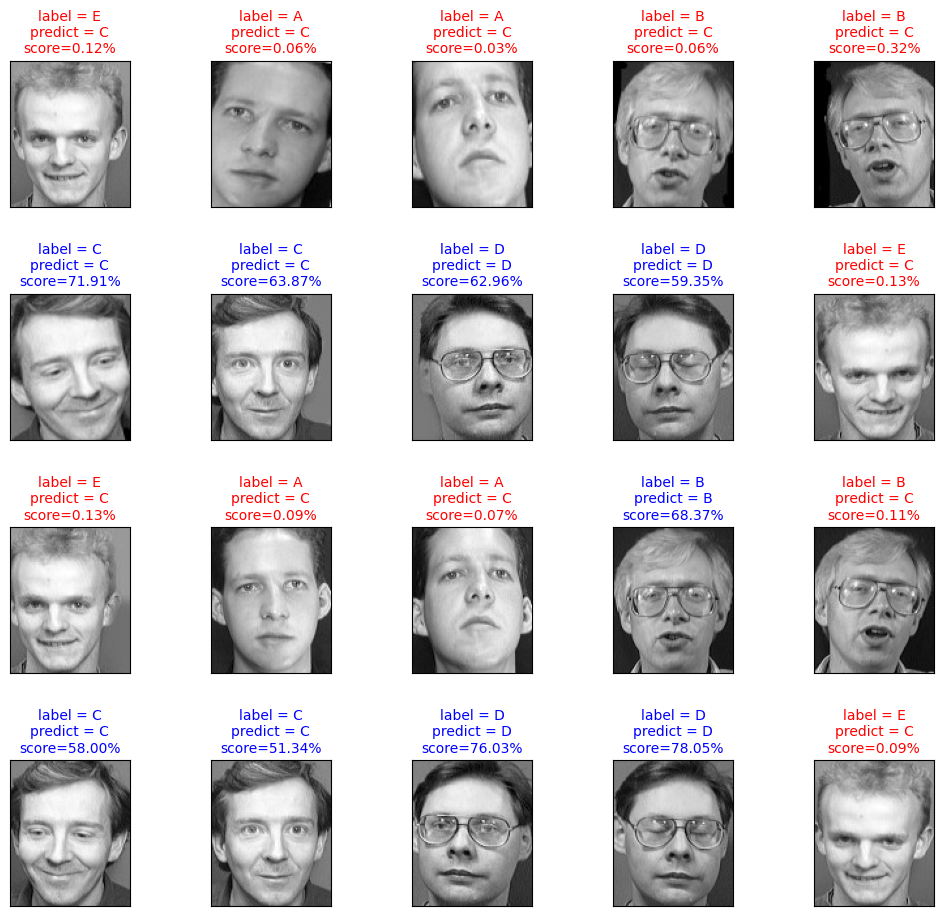

In [18]:
NAMES = ['A', 'B', 'C', 'D', 'E']
plot_images_labels_prediction(test_feature, np.argmax(test_label_onehot, axis=1), np.argmax(predict, axis=1), NAMES, predictions_array=predict)